# Exploring Categorical Data


## Results

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_dir = '../tabular-playground-series-mar-2021/train.csv'

df = pd.read_csv(train_dir)


In [4]:
df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [31]:
df.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4',
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target'],
      dtype='object')

# Lets look at the distribution of some of the categorical data

<AxesSubplot:>

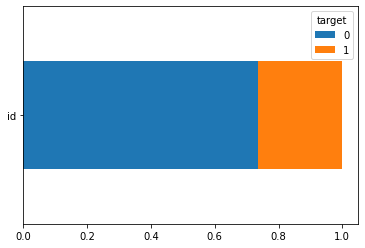

In [19]:
(df.groupby('target').agg({'id':'count'})/df.id.count()).T.plot(kind='barh', stacked=True)

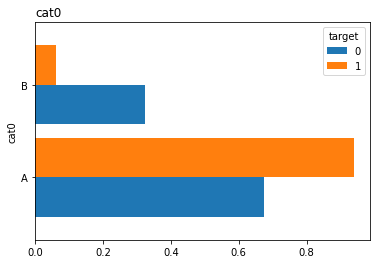

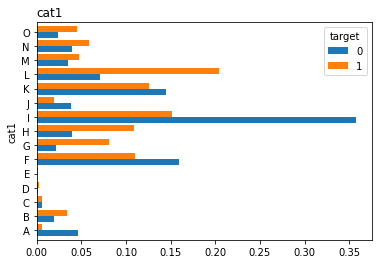

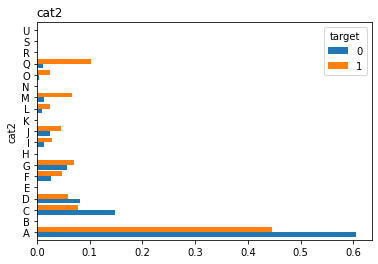

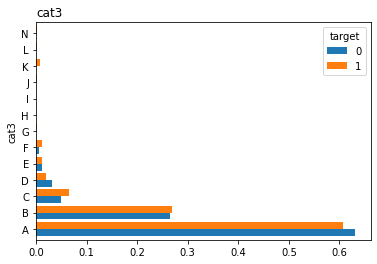

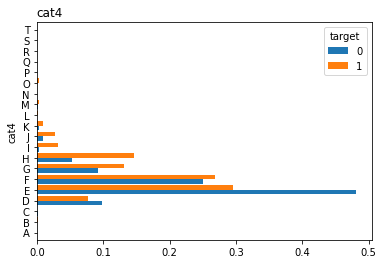

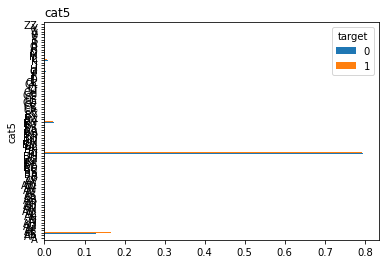

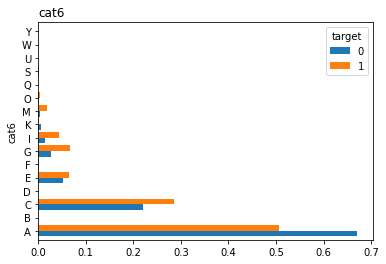

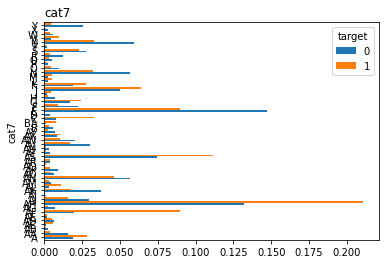

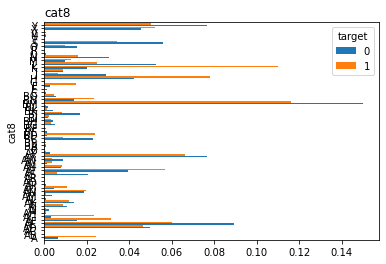

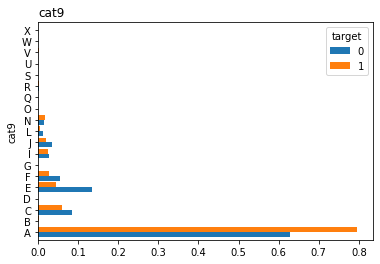

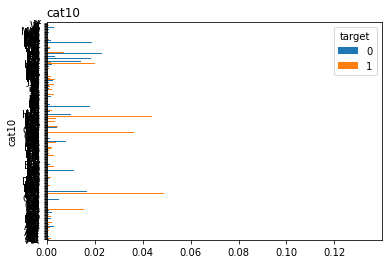

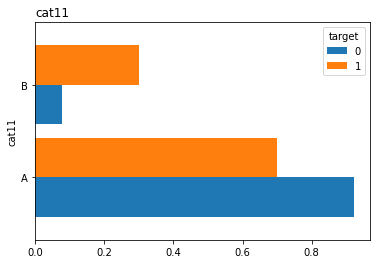

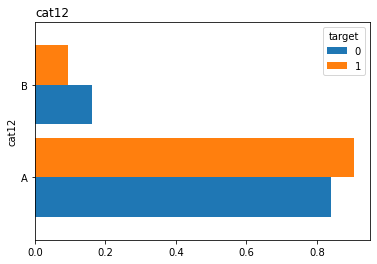

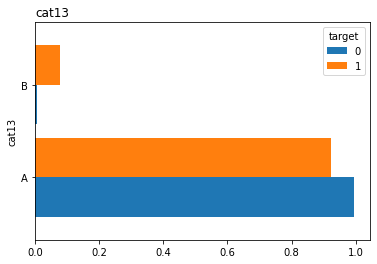

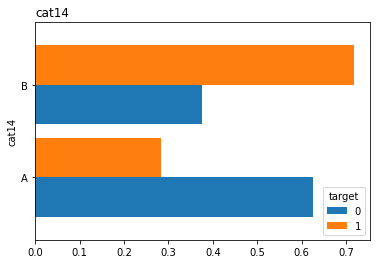

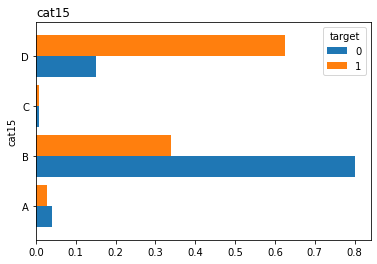

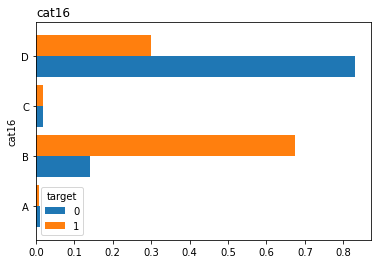

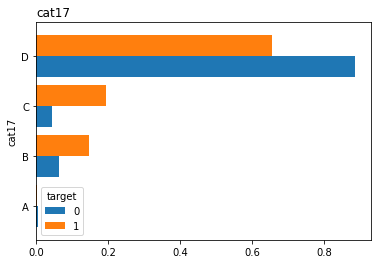

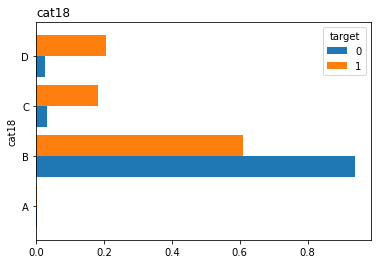

In [33]:
cat = 'cat1'

for cat in [f'cat{i}' for i in range(19)]:
    f,ax = plt.subplots()
    (
        df
        .groupby([cat, 'target'])
        .agg({'id':'count'})
        .join(df.groupby('target').agg(total=('id','count')))
        .assign(percentage=lambda x: x['id']/x['total'])
        .reset_index()
        .pivot(
            index = 'target',
            columns = cat,
            values= 'percentage'
        )
        .T
        .plot(
            kind='barh',
            width=0.85,
            ax=ax
        )
    )
    ax.set_title(cat, x=0, ha='left')